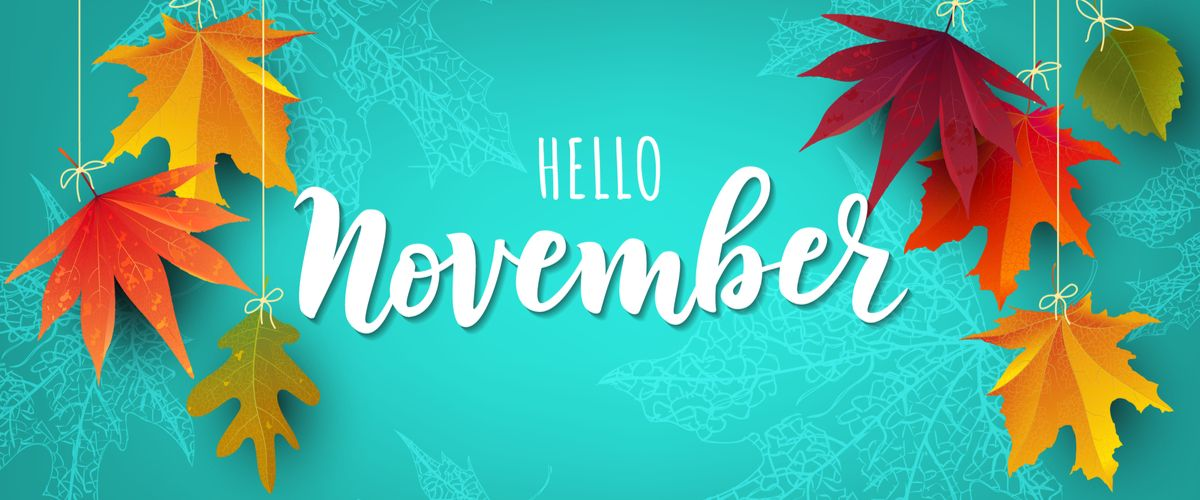

# 🔥TPS NOVEMBER 
## This Notebook is purely the implementation of the autoxgb written by Abhishek https://www.kaggle.com/abhishek
### I have done a simple EDA and trained using Autoxgb, loaded the model and created the submission file.
### Note- No FE was done and it's a single model.

In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import datatable as dt



In [ ]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [ ]:
%%time
train = dt.fread('../input/tabular-playground-series-nov-2021/train.csv').to_pandas().drop('id', axis=1)
train = reduce_memory_usage(train)
test = dt.fread('../input/tabular-playground-series-nov-2021/test.csv').to_pandas().drop('id', axis=1)
test = reduce_memory_usage(test)
ss = dt.fread('../input/tabular-playground-series-nov-2021/sample_submission.csv').to_pandas()
ss = reduce_memory_usage(ss)

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
display(train.isna().sum().sum())
display(test.isna().sum().sum())

In [ ]:
train.describe().T

In [ ]:
#Lets find traget variable distribution
target_varibale=train['target']
pal = ['#5ddef4','#8e99f3']
plt=sns.countplot(x=train.target,palette=pal)
plt.set_title('Target  distribution', fontsize=20, y=1.05)

In [ ]:
categorical_features=[]
numerical_features=[]
for i in train.columns:
    if train[i].dtype=='float64':
#         print('yes')
        numerical_features.append(i)
    elif i!='target':
        categorical_features.append(i)
#         print('no')

In [ ]:
display(len(categorical_features))
display(len(numerical_features))

### NOTE- There are no categorical features

In [ ]:
train.head()

In [ ]:
# !pip install  autoxgb 

In [ ]:
!autoxgb train \
--train_filename ../input/tabular-playground-series-nov-2021/train.csv \
--test_filename ../input/tabular-playground-series-nov-2021/test.csv \
--id IDX \
--target target \
--task classification \
--time_limit 3600 \
--output ./kk \
--use_gpu

In [ ]:
import joblib

xgb_model = joblib.load('./kk/axgb_model.4')


In [ ]:
pred_df=dt.fread('./kk/test_predictions.csv').to_pandas()

final_class=[]
for i in pred_df.iterrows():
    current_class=1
    if i[1][1] >i[1][2]:
        current_class=0
        final_class.append(current_class)
    else:
         final_class.append(current_class)
        
    

In [ ]:
len(final_class)
set(final_class)

In [ ]:
ss = dt.fread('../input/tabular-playground-series-nov-2021/sample_submission.csv').to_pandas()
ss['target'] = final_class
ss.to_csv('xgb1111.csv', index=False)
ss.head()